## Описание проекта

Общая информация:
 - Область приминения - HR аналитика, оптимизация управления персоналом
 - Бизнес-цель - избежать финансовых потерь и оттока сотрудников 
 - Данные для машинного обучения предоставлены из форм обратной связи 
 
Конвертация в задачи data science:
 - Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Целовой признак для Задачи 1 - уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
 - Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании. Для этой задачи используются те же входные признаки. Однако целевой признак - quit (увольнение сотрудника из компании).

## Задача 1: предсказание уровня удовлетворённости сотрудника

### Загрузка данных

##### Установка

In [1]:
!pip install phik

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U numpy

  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip  install  --upgrade shap numba 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade scipy scikit-learn pandas matplotlib seaborn "numpy<2.0.0" 

  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


##### Загрузка библиотек

In [6]:
import pandas as pd

In [7]:
# загрузка класса pipeline
from sklearn.pipeline import Pipeline
# загрузка класса для работы с пропусками
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
from sklearn.model_selection import train_test_split
import seaborn as sns
# загрузка класса pipeline
from sklearn.pipeline import Pipeline

# загрузка классов для подготовки данных
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# загрузка класса для работы с пропусками
from sklearn.impute import SimpleImputer

# загрузка функции для работы с метриками
from sklearn.metrics import roc_auc_score

# загрузка класса RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# загрука нужных моделей
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier

import shap

##### Загрузка данных

In [8]:
# Загрузка тренировочной выборки: train_job_satisfaction_rate.csv
try:

    train_job=pd.read_csv(r"")
except FileNotFoundError:
    train_job=pd.read_csv(r"")
    
# Загрузка входных признаков тестовой выборки: test_features.csv
try:
    test_features=pd.read_csv(r"")
except FileNotFoundError:
    test_features=pd.read_csv(r"")
    
# Загрузка целевого признака тестовой выборки: test_target_job_satisfaction_rate.csv
try:    
    test_target=pd.read_csv(r"")
except FileNotFoundError:
    test_target=pd.read_csv(r"")
    

### Предобработка данных

 Изучены данные и сделаны выводы. При необходимости выполнена предобработка. Если есть пропуски, они будут заполнены в пайплайне.

In [12]:
def table_list(table):
    print('Рассмотрим таблицу')
    display(table.info())
    display(table.head())
    print('-'*50)
tables=[train_job, test_features, test_target]
for i in tables:
    table_list(i)

Рассмотрим таблицу
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


--------------------------------------------------
Рассмотрим таблицу
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


--------------------------------------------------
Рассмотрим таблицу
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


--------------------------------------------------


Итоги:
 -  В таблице train_job пропуски в категориальных признаках dept и level. Будут заполнены в пайплайне модой. 4000 строк, 10 колонок. Все признаки имеют правильный тип. Содержит все признаки.
 - В таблице test_features также пропуски в категориальных признаках dept и level. Будут заполнены в пайплайне модой. 2000 строк, 9 колонок. Все признаки имеют правильный тип. Содержит входные признаки.
 - В таблице test_target нет пробелов, 2000 строк, 2 колонки. Все признаки имеют правильный тип. Содержит целевой признак.
 - Во все таблицах сохранен стиль в наименовании столбцов (нижний регистр и нижнее подчеркивание).

In [13]:
# Проверка на явные дубликаты
for i in tables:
    print(i.duplicated().sum())

0
0
0


In [14]:
# Проверка на неявные дубликаты
def possible_dublicates(table, column):
    if table[column].dtype == object:
        print('в признаке', column, 'уникальные значения:', table[column].unique())
train_job_parameters=train_job.columns
test_features_parameters=test_features.columns

In [15]:
for parameter in train_job_parameters:
    possible_dublicates(train_job, parameter)

в признаке dept уникальные значения: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
в признаке level уникальные значения: ['junior' 'middle' 'sinior' nan]
в признаке workload уникальные значения: ['medium' 'high' 'low']
в признаке last_year_promo уникальные значения: ['no' 'yes']
в признаке last_year_violations уникальные значения: ['no' 'yes']


In [16]:
for parameter in test_features_parameters:
    possible_dublicates(test_features, parameter)

в признаке dept уникальные значения: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
в признаке level уникальные значения: ['junior' 'middle' 'sinior' nan]
в признаке workload уникальные значения: ['medium' 'low' 'high' ' ']
в признаке last_year_promo уникальные значения: ['no' 'yes']
в признаке last_year_violations уникальные значения: ['no' 'yes']


In [17]:
#Изучение данных на наличие пробелов
#train_job, test_features, test_target
category_l=['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
for i in category_l:
    print(i, train_job[i].unique())
    print(i, test_features[i].unique())
#В таблице test_features в параметрах dept, workload пустые строки.

dept ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level ['junior' 'middle' 'sinior' nan]
level ['junior' 'middle' 'sinior' nan]
workload ['medium' 'high' 'low']
workload ['medium' 'low' 'high' ' ']
last_year_promo ['no' 'yes']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']
last_year_violations ['no' 'yes']


In [18]:
#Функция для изменения пробелов на NaN
def possible_breaks(table, column):
    if table[column].dtype == object:
        table.loc[table[column].str.strip()=='', column]=np.nan

In [19]:
possible_breaks(test_features, 'dept')
possible_breaks(test_features, 'workload')

In [20]:
print(test_features['dept'].unique())
print(test_features['workload'].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['medium' 'low' 'high' nan]


### Исследовательский анализ данных

 Исследованы все признаки и сделаны выводы о том, как их нужно подготовить.

##### Визуализация данных.

In [21]:
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [23]:
list_for_graphs1=['salary', 'job_satisfaction_rate']

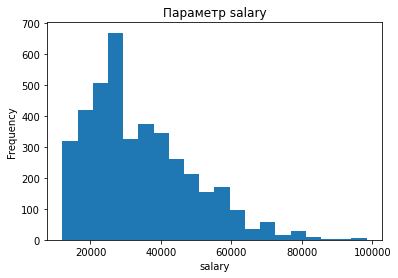

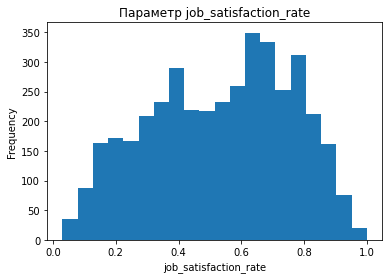

In [24]:
# Изучение количественных признаков таблицы train_job:
for col in list_for_graphs1:
    graphs1=train_job[col].plot(kind='hist', title=(f'Параметр {col}'), bins=20)
    graphs1.set_xlabel(col)
    graphs1.set_ylabel('Frequency')
    plt.show()

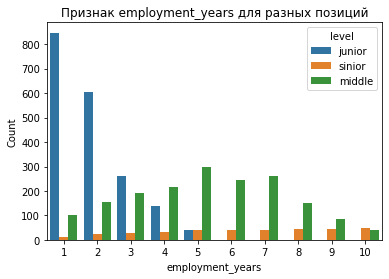

In [25]:
graphs101=sns.countplot(train_job, x="employment_years", hue="level")
graphs101.set_xlabel("employment_years")
graphs101.set_ylabel('Count')
graphs101.set_title('Признак employment_years для разных позиций')
graphs101;

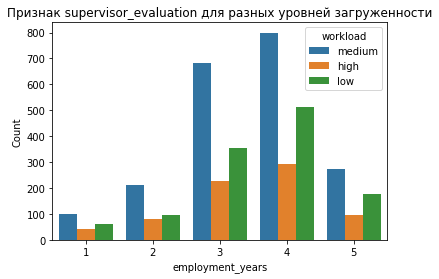

In [26]:
graphs102=sns.countplot(train_job, x="supervisor_evaluation", hue="workload")
graphs102.set_xlabel("employment_years")
graphs102.set_ylabel('Count')
graphs102.set_title('Признак supervisor_evaluation для разных уровней загруженности')
graphs102;

In [27]:
train_job.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


Итоги:
- Признаки employment_years и supervisor_evaluation являются дискретными; признаки salary и job_satisfaction_rate являются непрерывными.
- распределение признака employment_years не является нормальным и больше похоже на распределение Пуассона. Видно, что чаще всего люди работают в компании 1-2 года. Далее меньшая группа работает 3-7 лет. Более 8 лет работает малое количество людей. Возможно, в фирме есть текучка кадров.
- Признак supervisor_evaluation показывает, что в большинстве люди оценены по своей работе на 4 (хорошо), далее 3 (удовлетворительно). Это средние показатели.
- Распределение параметра salary смещено влево, в сторону меньшей зарплаты. Либо компания не очень щедрая, либо набирает много людей на начальные (низкооплачиваемые позиции). Средняя зарплата 33 тыс рублей, медианная 30 тыс рублей. Однако максимум 98 тыс рублей.
- Целевой признак job_satisfaction_rate представлен нормальным распределением с двумя пиками: одни люди удовлетворены компанией меньше среднего 0.4, в то время как другие удоблетворены больше среднего 0.65

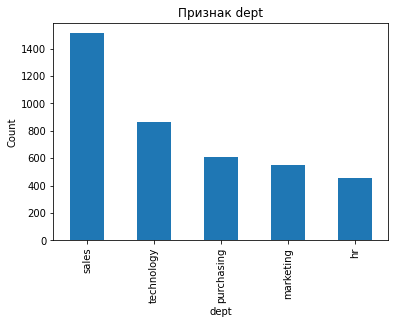

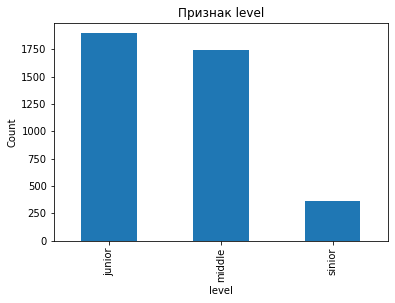

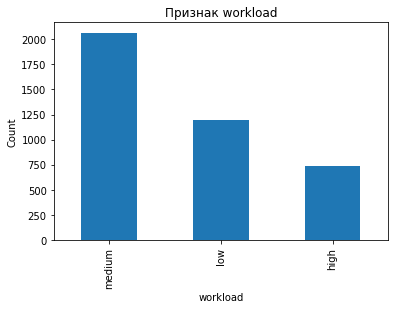

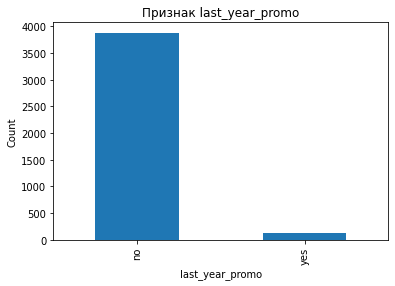

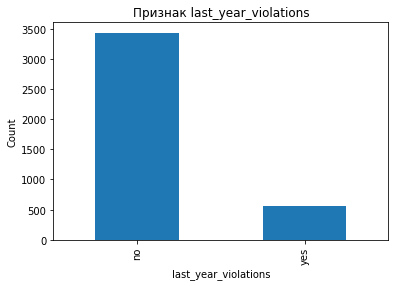

In [28]:
# Изучение качетсвенных признаков таблицы train_job:
train_job_category=['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
for col in train_job_category: 
    graphs2 = train_job[col].value_counts().plot(kind='bar')
    graphs2.set_title(f'Признак {col}')
    graphs2.set_xlabel(col)
    graphs2.set_ylabel('Count')
    plt.show()

Итоги: 
 - Среди категориальных признаков присутствуют два признака, которые имеют иерархию: level (juniot-middle-sinior) и workload (low-medium-high). Эти признаки будут закодированы с помощью Ordinal-кодирования.
 - Два категориальных признака являются бинарными: last_year_promo, last_year_violations. Классы распределены неравномерно: мажорный класс "no", минорный - "yes".
 - Признак dept многоклассовый, чаще всего встречается класс "sales".

###### Дополнительные исследования в таблице train_job.

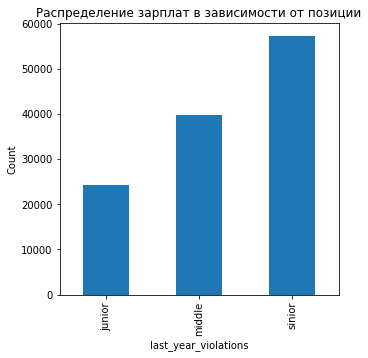

In [29]:
# Изучение смещения зарплат в сторону меньших значений.
graphs3=train_job.groupby('level')['salary'].mean().plot(kind='bar', figsize=(5, 5))
graphs3.set_title('Распределение зарплат в зависимости от позиции')
graphs3.set_xlabel(col)
graphs3.set_ylabel('Count')
plt.show()
#Итог: понабрали людей на низкие должности, платят им маленькую зарплату.
#Людей на высоких должностях мало и они получают высокую зарплату.

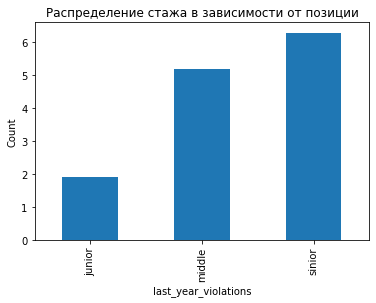

In [30]:
# Изучение смещения лет работы в сторону меньших значений.
graphs4=train_job.groupby('level')['employment_years'].mean().plot(kind='bar',)
graphs4.set_title('Распределение стажа в зависимости от позиции')
graphs4.set_xlabel(col)
graphs4.set_ylabel('Count')
plt.show()
#Такое смещение (люди в большинстве работают 1-2 года в компании) обеспечивают как раз juniors.

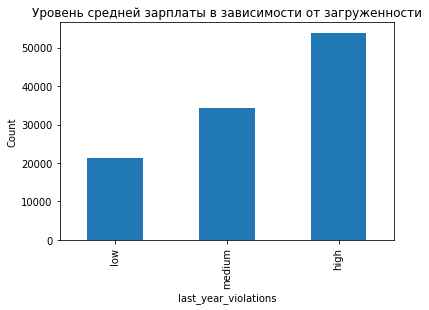

In [31]:
# Изучение насколько уровень занятости влияет на зарплату.
graphs32=train_job.groupby('workload')['salary'].mean().sort_values().plot(kind='bar')
graphs32.set_title('Уровень средней зарплаты в зависимости от загруженности')
graphs32.set_xlabel(col)
graphs32.set_ylabel('Count')
plt.show()
# Все выглядит достаточно справедливо. Меньше загруженность - меньше зарплата.

###### Исследования таблицы test_features

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


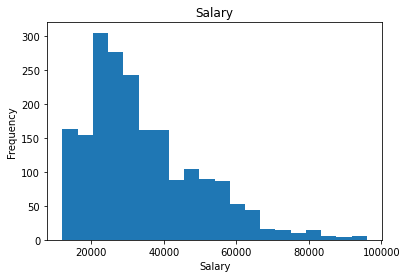

In [32]:
#Изучение количественных признаков таблицы test_features:
graphs5=test_features['salary'].plot(kind='hist', bins=20)
graphs5.set_xlabel("Salary")
graphs5.set_ylabel('Frequency')
graphs5.set_title('Salary')
display(test_features.describe())
graphs5;

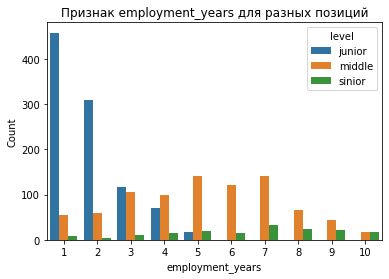

In [33]:
graphs501=sns.countplot(test_features, x="employment_years", hue="level")
graphs501.set_xlabel("employment_years")
graphs501.set_ylabel('Count')
graphs501.set_title('Признак employment_years для разных позиций')
graphs501;

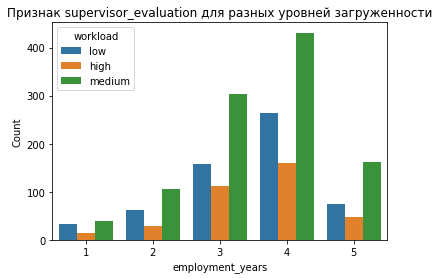

In [34]:
graphs502=sns.countplot(test_features, x="supervisor_evaluation", hue="workload")
graphs502.set_xlabel("employment_years")
graphs502.set_ylabel('Count')
graphs502.set_title('Признак supervisor_evaluation для разных уровней загруженности')
graphs502;

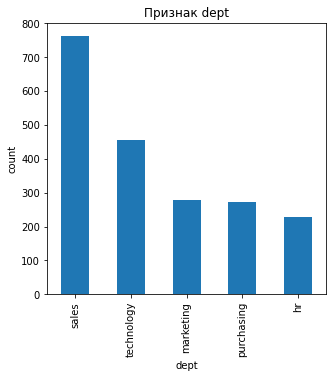

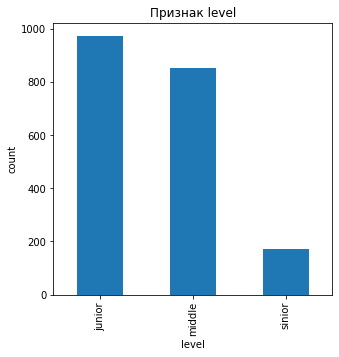

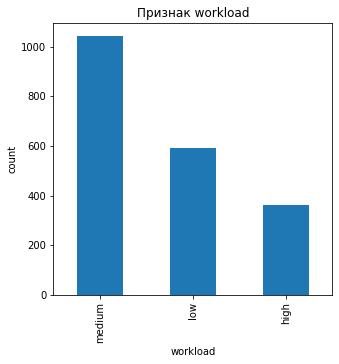

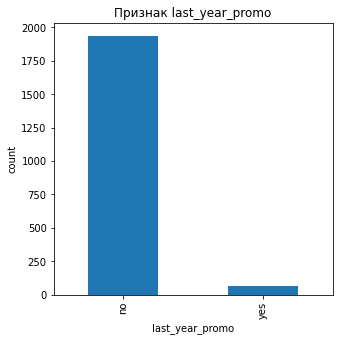

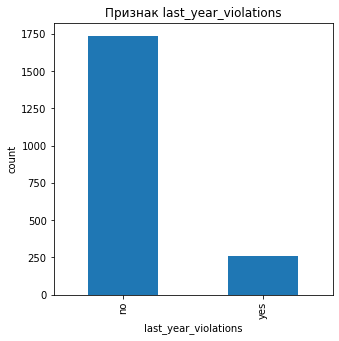

In [35]:
# Изучение качетсвенных признаков таблицы test_features:
test_features_category=['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
for col in test_features_category: 
    graphs6 = test_features[col].value_counts().plot(kind='bar', figsize=(5, 5))
    graphs6.set_title(f'Признак {col}')
    graphs6.set_xlabel(col)
    graphs6.set_ylabel('count')
    plt.show()

###### Исследования таблицы test_target

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


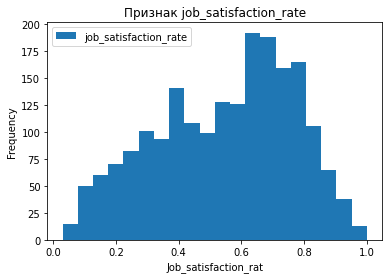

In [36]:
# Изучение количественных признаков таблицы test_target:
graphs7=test_target.drop(['id'], axis=1).plot(kind='hist', bins=20)
display(test_target.describe())
graphs7.set_title(f'Признак job_satisfaction_rate')
graphs7.set_xlabel('Job_satisfaction_rat')
graphs7.set_ylabel('Frequency')
graphs7;

Итоги:
 - Значения признаков и их распределения в таблицах test_features, test_target соответствуют таблице train_job.

##### Корреляционный анализ данных.

In [37]:
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [38]:

numeric_list=['salary', 'job_satisfaction_rate']

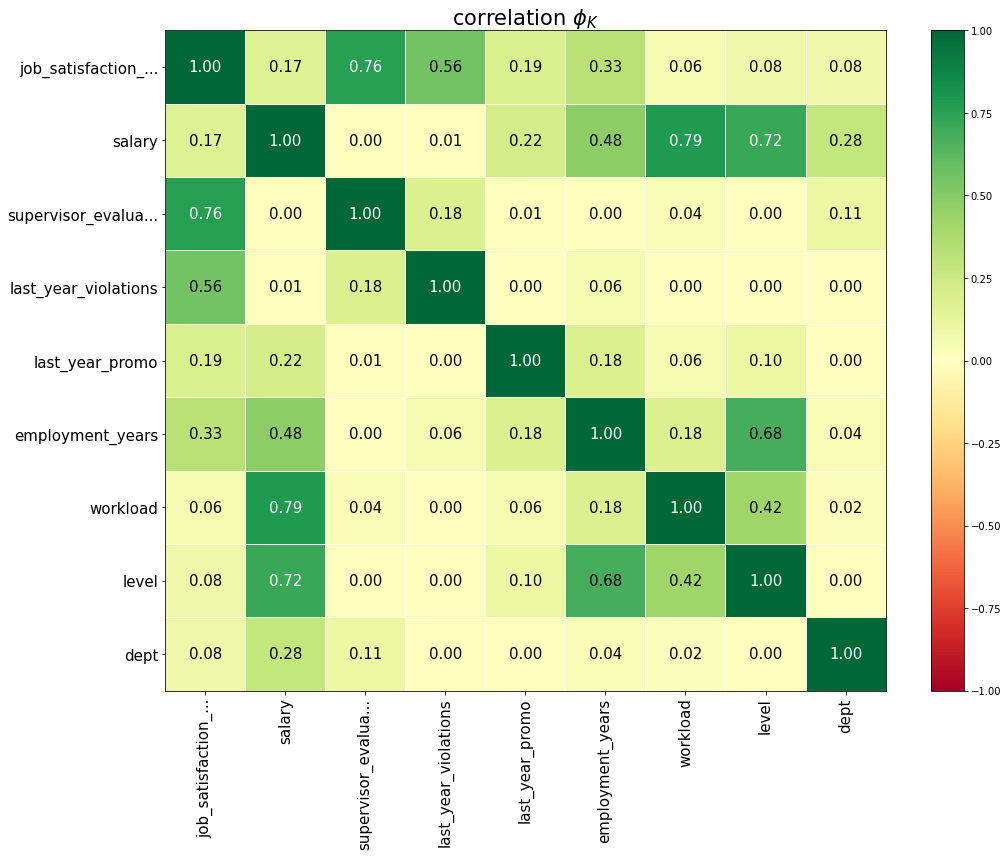

In [39]:
# phik correlation matrix для всех признаков, для линейных и нелинейных связей.
from phik.report import plot_correlation_matrix
from phik import report

# список интервальных признаков
interval_cols = numeric_list

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = train_job.drop(['id'], axis=1).phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

Итоги: Использовался phik для определения нелинейных зависимостей между всеми типами параметров.
 - Целевой признак job_satisfaction_rate имеет хорошую корреляцию с supervision evaluation (0.76); last_year_violations(0.56)?; employment_years(0.33). Видимо, хорошие работники без нарушений и хорошей оценкой за свою работу и сами довольны компанией. Все взаимно.
 - Между признаками salary и workload сильная корреляция (0,79); salary и workload сильная корреляция (0,72). Это логично, чем выше должность, тем больше зарплата. Это было выяснено еще на предыдущем этапе.
 - Между level и employment_years сильная корреляция (0.68), это было выявлено на предыдущих этапах.
 - Между признаками level & workload, а так же между признаками employment_years и salary так же есть связь, это логично, чем выше должность - тем больше загруженность. С годами работы зарплату увеличивали (возможно, через повышения и индексацию).
 - Нет явных признаков мультиколлинеарности. Пока нет повода исключать какой-либо из признаков по этой причине.
 - Признаки level, workload и dept имеют самую слабую связь с целевым параметром job_satisfaction_rate.

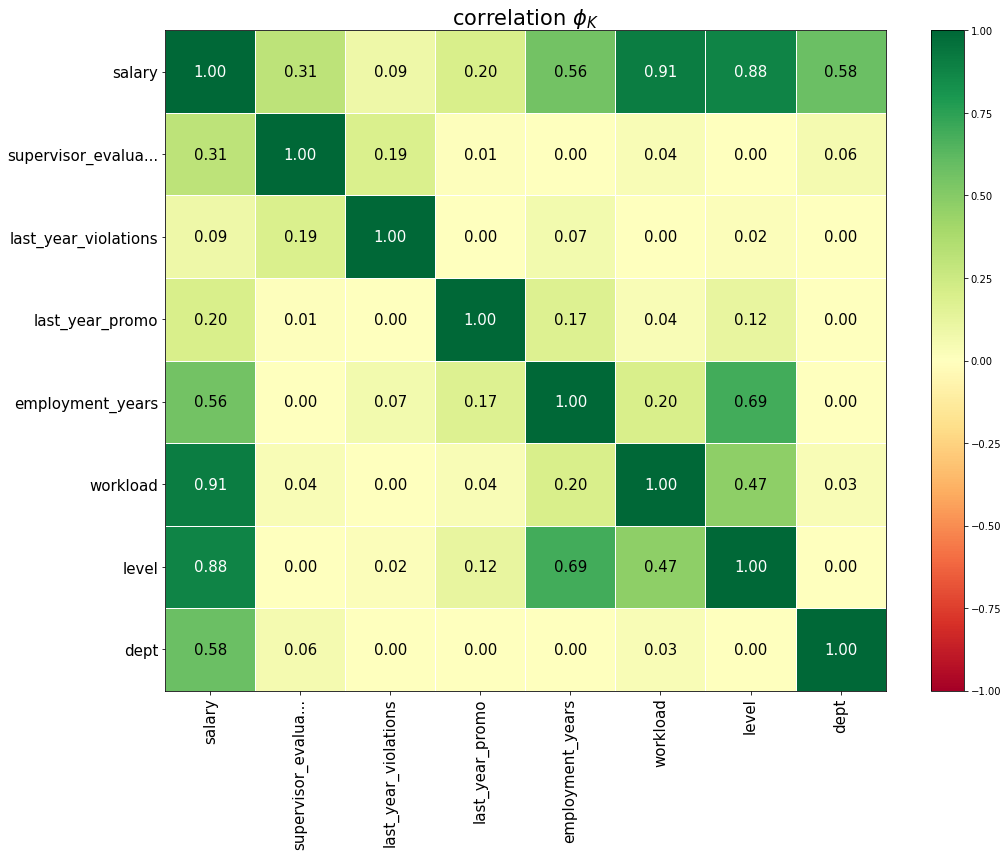

In [40]:
# phik correlation matrix для всех признаков, для линейных и нелинейных связей.
from phik.report import plot_correlation_matrix
from phik import report


# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = test_features.drop(['id'], axis=1).phik_matrix(interval_cols='salary')

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

Аналогичный корреляционный анализ проведен для тестовой выборки. По результатам видно, что в данных нет существенных различий в части распределений признаков и оценка модели, полученная на test выборке, будет корректной. Корреляционные зависимости сохраняются и отличаются местами на сотые.

### Подготовка данных

Подготовка признаков выполнена в пайплайне, дополнен пайплайн шага предобработки. При кодировании учитываются особенности признаков и моделей и используется как минимум два кодировщика.

In [41]:
# определение констант
RANDOM_STATE = 42

In [42]:
train_job.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [43]:
test_job = test_features.set_index('id').join(test_target.set_index('id'))

In [1]:
test_job.duplicated().sum()

NameError: name 'test_job' is not defined

In [45]:
test_job.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [46]:
# разбивка данных на тренировочную и тестовую выборки
X_train=train_job.set_index('id')
X_train.duplicated().sum()

245

In [47]:
X_train.drop_duplicates(inplace=True)
X_train.duplicated().sum()

0

In [48]:
X_train.drop(['job_satisfaction_rate'], axis=1, inplace=True)
X_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000
653870,hr,junior,high,2,no,no,5,38400
184592,sales,junior,low,1,no,no,2,12000
171431,technology,junior,low,4,no,no,2,18000
693419,hr,junior,medium,1,no,no,3,22800


In [49]:
y_train=train_job['job_satisfaction_rate']
X_test=test_job.drop(['job_satisfaction_rate'], axis=1)
y_test = test_job['job_satisfaction_rate']
X_train.shape, X_test.shape, y_train.shape

((3755, 8), (2000, 8), (4000,))

In [50]:
y_train=train_job.set_index('id')['job_satisfaction_rate']
y_train = y_train.loc[X_train.index]
X_train.shape, X_test.shape, y_train.shape

((3755, 8), (2000, 8), (3755,))

In [51]:
# создание списков с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [52]:
# создание пайплайна для подготовки признаков из списка ohe_columns
# OHE кодирование
# учитывание дамми-ловушек
# пропуски заполнены модой в SimpleImputer
ohe_pipe = Pipeline(
    [
        (
            "simpleImputer_ohe",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "ohe",
            OneHotEncoder(
                drop="first", 
                handle_unknown="ignore", sparse_output=False #другая версия sparse_output=Fals 
            ),
        ),  
    ]
)

In [53]:
# создание пайплайна для подготовки признаков из списка ord_columns 
# Ordinal-кодирование
# пропуски заполнены модой в SimpleImputer
ord_pipe = Pipeline(
    [
        (
            "simpleImputer_before_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "ord",
            OrdinalEncoder(
                categories=[['junior', 'middle', 'sinior'],
                           ['low', 'medium', 'high']],
                handle_unknown="use_encoded_value",
                unknown_value=np.nan,
            ),
        ),
        (
            "simpleImputer_after_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
    ]
)

In [54]:
# создание пайплайна для подготовки признаков из списка num_columns
# заполнение пропусков SimpleImputer
# масштабирование MinMaxScaler()
num_pipe = Pipeline(
    [
        (
            "simpleImputer_num",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "scaler",
            MinMaxScaler(),
        ),  
    ]
)

In [55]:
# создание общего пайплайна для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ("ohe", ohe_pipe, ohe_columns),
        ("ord", ord_pipe, ord_columns),
        ("num", num_pipe, num_columns),
    ],
    remainder="passthrough",
)

In [56]:
# создание итогового пайплайна: подготовка данных и базовая модель - дерево решений
pipe_final = Pipeline(
    [
        ("preprocessor", data_preprocessor),
        ("models", DummyRegressor(strategy='mean')),
    ]
)

### Обучение моделей

- Обучены две модели: линейная модель и дерево решений. Подобраны гиперпараметры для одной из моделей. Использованы два метода масштабирования. Выбрана лучшая модель и проверено её качество метрикой SMAPE (symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 
- Написана функция, которая принимает на вход массивы NumPy или объекты Series в pandas и возвращает значение метрики SMAPE. Использована эта метрика при подборе гиперпараметров и оценке качества моделей. Критерий успеха: SMAPE ≤ 15 на тестовой выборке.
- В решении сохранена работа со всеми моделями, которые были опробованы.

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        "models": [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        "models__max_depth": range(10, 15),
        "models__max_features": range(2, 15),
        "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
    },
    # линейная модель
    {
        "models": [LinearRegression()],
        "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
    }
]

In [59]:
# Написание метрики SMAPE
def smape_metric(y, y_pred):
    return 200*np.nanmean(
        np.divide(
            abs(y - y_pred),
            abs(y) + abs(y_pred)
        )
    )

In [60]:
# создание объектов пользовательской метрики
from sklearn.metrics import make_scorer
scorer = make_scorer(smape_metric, greater_is_better=False)

In [61]:
# Выбор лучшей модели с использованием метрики SMAPE
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scorer, 
    error_score='raise',#показывать какие ошибки
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=40,
    
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика по кросс-валидации:', abs(randomized_search.best_score_))
model=randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
X_train = preprocessor.transform(X_train)
model.fit(X_train, y_train)
preds = model.predict(X_train)
print('Метрика на тренировочной выборке:', smape_metric(y_train, preds))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [62]:
# проверка работы модели на тестовой выборке
# прогноз на тестовых данных
y_pred = randomized_search.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {smape_metric(y_test, y_pred)}')

Метрика SMAPE на тестовой выборке: 14.812612789281237


### Оформление выводов

  - Модель, которая справилась лучше - DecisionTreeRegressor(max_depth=12, max_features=8, random_state=42)
  - Метрика по кросс-валидации: 15.630720846107891
  - Метрика на тренировочной выборке: 7.797760082871171
  - Метрика SMAPE на тестовой выборке: 14.812612789281237
  - Достигнуто требуемое качество модели sMAPE <= 15


### Промежуточные выводы

Выполнена Задача N1. Построена модель дерева решений, которая предсказывает уровень удовлетворённости сотрудника на основе данных заказчика. Удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник. Модель проверена метрикой SMAPE и показала хороший результат. Данные, полученные из задачи 1 будут использоваться для решения задачи 2 и формулировки конечных бизнесс предложений.

## Задача 2: предсказание увольнения сотрудника из компании

### Загрузка данных

 - Для этой задачи будут использованы те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

In [65]:
try:
    # Тренировочная выборка: train_quit.csv
    train_quit=pd.read_csv(r"")
except FileNotFoundError:    
    train_quit=pd.read_csv(r"")
try:
    # Целевой признак тестовой выборки: test_target_quit.csv
    test_target_quit=pd.read_csv(r"")
except FileNotFoundError:    
    test_target_quit=pd.read_csv(r"")

### Предобработка данных

 - Изучены данные и сделаны выводы. При необходимости выполнена предобработка. Если есть пропуски, заполнены они в пайплайне.

In [66]:
# Изучение данных
def table_list(table):
    print('Рассмотрим таблицу')
    display(table.info())
    display(table.head())
    print('-'*50)
tables_2=[train_quit, test_target_quit]
for i in tables:
    table_list(i)

Рассмотрим таблицу
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


--------------------------------------------------
Рассмотрим таблицу
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


--------------------------------------------------
Рассмотрим таблицу
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


--------------------------------------------------


In [67]:
# Проверка на явные дубликаты
for i in tables_2:
    print(i.duplicated().sum())

0
0


In [68]:
# Проверка на неявные дубликаты
def possible_dublicates(table, column):
    if table[column].dtype == object:
        print('в признаке', column, 'уникальные значения:', table[column].unique())
train_quit_parameters=train_quit.columns
test_target_quit_parameters=test_target_quit.columns

In [69]:
for parameter in train_quit_parameters:
    possible_dublicates(train_quit, parameter)

в признаке dept уникальные значения: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
в признаке level уникальные значения: ['middle' 'junior' 'sinior']
в признаке workload уникальные значения: ['high' 'medium' 'low']
в признаке last_year_promo уникальные значения: ['no' 'yes']
в признаке last_year_violations уникальные значения: ['no' 'yes']
в признаке quit уникальные значения: ['no' 'yes']


In [70]:
for parameter in test_target_quit_parameters:
    possible_dublicates(test_target_quit, parameter)

в признаке quit уникальные значения: ['yes' 'no']


Итоги:
 -  В таблице train_quit нет пропусков и пустых строк. 4000 строк, 10 колонок. Все признаки имеют правильный тип. Содержит все признаки.
 - В таблице test_target_quit нет пропусков и пустых строк. 2000 строк, 2 колонки. Категориальный целевой признак имеет правильный тип.

### Исследовательский анализ данных

##### Визуализация данных.

###### Исследование таблицы train_quit

In [71]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


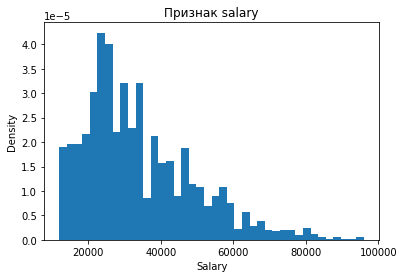

In [72]:
# Изучение количественных признаков таблицы train_job:
graphs10=train_quit['salary'].plot(kind='hist', bins=40, density=True)
graphs10.set_title('Признак salary')
graphs10.set_xlabel('Salary')
graphs10.set_ylabel('Density')
graphs10;

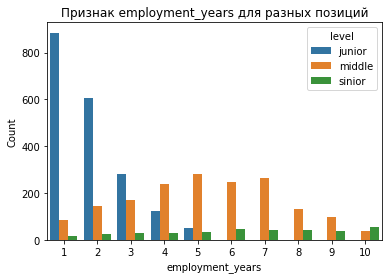

In [73]:
#Изучение дискретных признаков
graphs1001=sns.countplot(train_quit, x="employment_years", hue="level")
graphs1001.set_xlabel("employment_years")
graphs1001.set_ylabel('Count')
graphs1001.set_title('Признак employment_years для разных позиций')
graphs1001;

<Axes: xlabel='employment_years', ylabel='Density'>

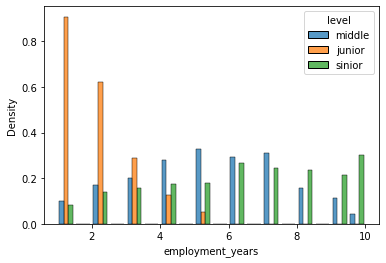

In [74]:
#Изучение параметра density
sns.histplot(train_quit, x="employment_years", hue="level", multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)

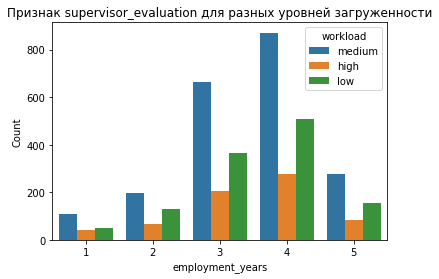

In [75]:
graphs1002=sns.countplot(train_quit, x="supervisor_evaluation", hue="workload")
graphs1002.set_xlabel("employment_years")
graphs1002.set_ylabel('Count')
graphs1002.set_title('Признак supervisor_evaluation для разных уровней загруженности')
graphs1002;

<Axes: xlabel='supervisor_evaluation', ylabel='Density'>

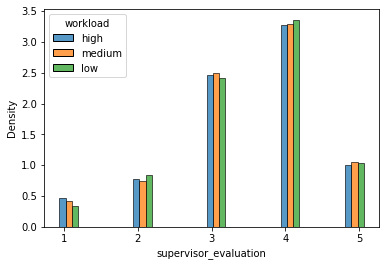

In [76]:
#Изучение параметра density
sns.histplot(train_quit, x="supervisor_evaluation", hue="workload", multiple="dodge", 
                  stat = 'density', 
             shrink = 2,
             common_norm=False)

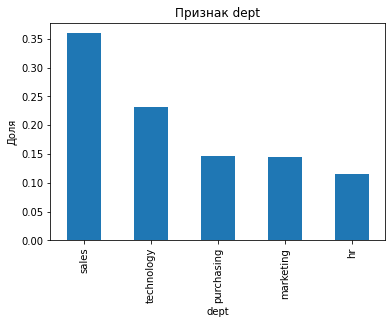

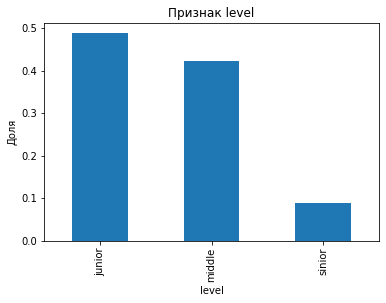

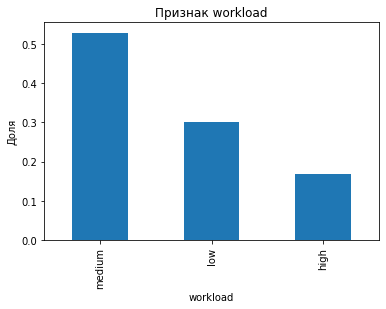

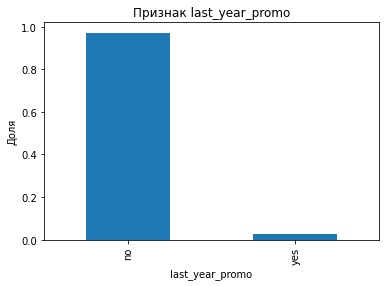

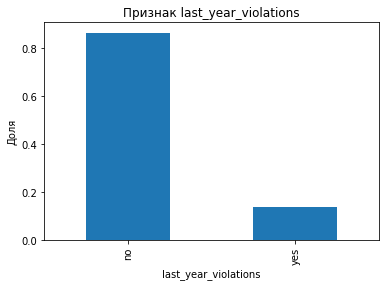

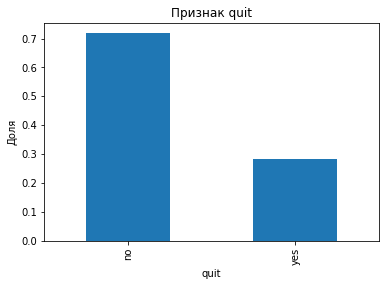

In [77]:
# Изучение качетсвенных признаков таблицы train_job:
train_quit_category=['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
for col in train_quit_category: 
    graphs11 = train_quit[col].value_counts(normalize=True).plot(kind='bar')
    graphs11.set_title(f'Признак {col}')
    graphs11.set_xlabel(col)
    graphs11.set_ylabel('Доля')
    plt.show()

Итоги:
 - Количественные и качественные призанаки в таблице train_quit распределены также, как в первой задаче. Значимых изменений нет.
 - Признак quit имеет мажорный класс no (сотрудник из компании не уволился) и минорный yes (сотрудник уволился).


###### Исследование таблицы test_target_quit

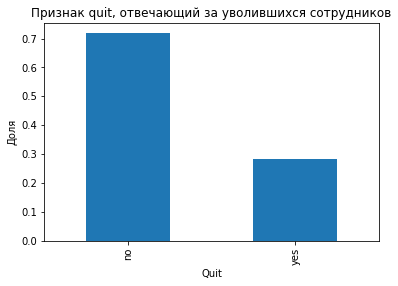

In [78]:
graphs12 = test_target_quit['quit'].value_counts(normalize=True).plot(kind='bar')
graphs12.set_title('Признак quit, отвечающий за уволившихся сотрудников')
graphs12.set_xlabel('Quit')
graphs12.set_ylabel('Доля')
graphs12;

##### Обоснование выбора признаков для более детального анализа.

Выше выполнена визуализация всех признаков, которые имеются в нашем распоряжении. Далее, проведен корреляционный анализ, который показывает с какими признаками имеется наибольшая связь у признака quit. Именно эти признаки будут рассмотрены более детально и лягут в основу более глубокого исследовательского анализа данных. По результатам матрицы корреляции ниже видно, что нужно изучить подробней признаки с наибольшей корреляцией с целевым признаком quit. Соответственно, надо изучать:
- Влияет ли отдел на увольнение сотрудников (может есть какой-то "плохой" отдел)
- Влияют ли загруженность и должность на увольнения
- Влияет ли зарплата на увольнение
<br/><br/> В главе "Составлен портрет «уволившегося сотрудника»" эти исследования уже представлены.

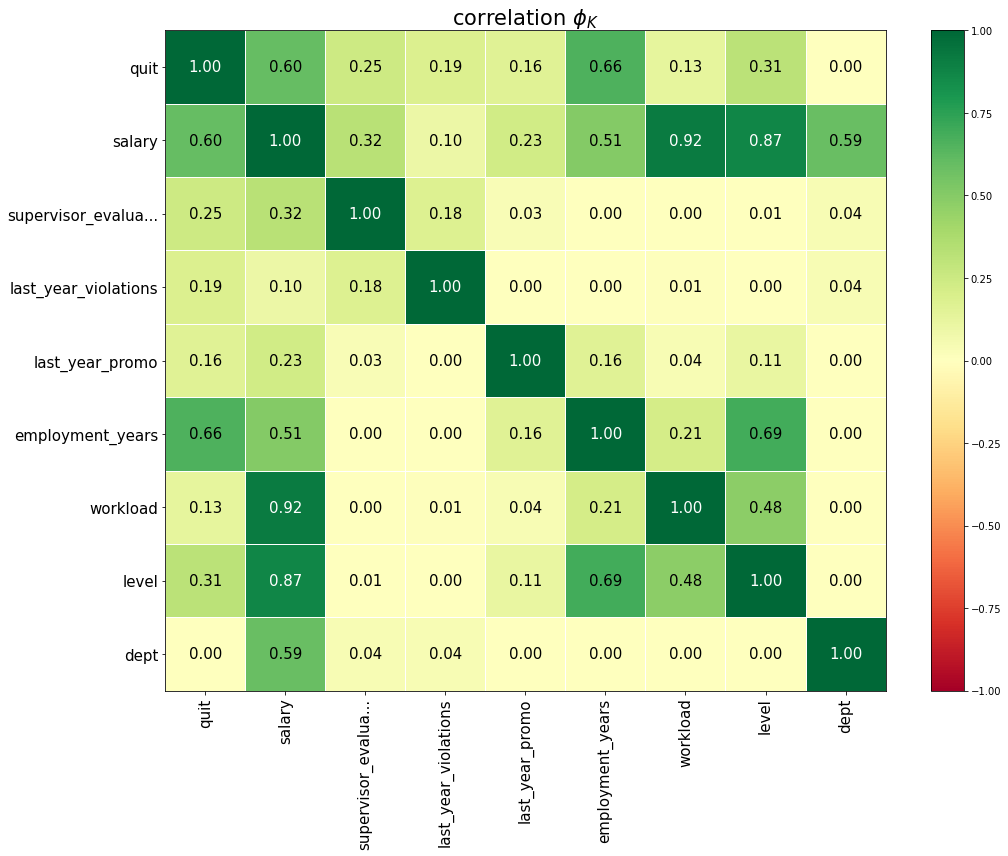

In [79]:
# phik correlation matrix для всех признаков, для линейных и нелинейных связей.
from phik.report import plot_correlation_matrix
from phik import report


# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = train_quit.drop(['id'], axis=1).phik_matrix(interval_cols='salary')

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

##### Составлен портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

In [80]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


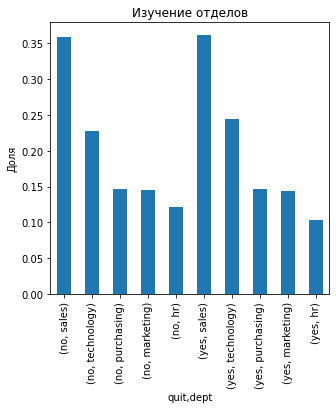

In [81]:
#отдел, в котором работал уволившийся сотрудник
graphs13=train_quit.groupby('quit')['dept'].value_counts(normalize=True).plot(kind='bar', figsize=(5, 5))
graphs13.set_title('Изучение отделов')
graphs13.set_ylabel('Доля')
plt.show()
#Больше всего сотрудников уходит из отделов, где больше всего людей. Логично, но неинформативно.

dept
hr            0.250000
marketing     0.280069
purchasing    0.282313
sales         0.283032
technology    0.297414
Name: dept, dtype: float64

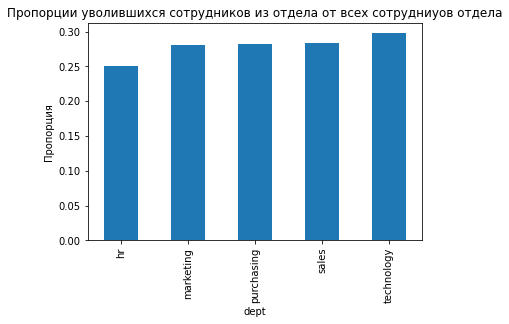

In [82]:
proportions=train_quit.loc[train_quit['quit']=='yes'].groupby('dept')['dept'].count()/train_quit.groupby('dept')['dept'].count()
display(proportions)
plot1=proportions.plot(kind='bar')
plot1.set_title('Пропорции уволившихся сотрудников из отдела от всех сотрудниуов отдела')
plot1.set_ylabel('Пропорция')
plot1;
#Чаще всего увольняются из отдела технологий, затем из продаж и далее из запокупок. В целом это самые большие отделы. 
#Тоесть какого-то "плохого отдела" нет.

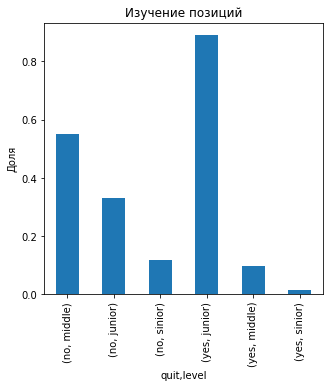

In [83]:
#уровень загруженности и должность уволившегося сотрудника
graphs14=train_quit.groupby('quit')['level'].value_counts(normalize=True).plot(kind='bar', figsize=(5, 5))
graphs14.set_title('Изучение позиций')
graphs14.set_ylabel('Доля')
plt.show()
#Увольняются во сновном новички

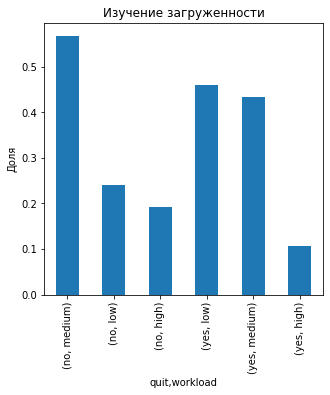

In [84]:
#уровень загруженности и должность уволившегося сотрудника
graphs14=train_quit.groupby('quit')['workload'].value_counts(normalize=True).plot(kind='bar', figsize=(5, 5))
graphs14.set_title('Изучение загруженности')
graphs14.set_ylabel('Доля')
plt.show()
#Увольняются с малой и средней загруженность.

In [85]:
#Сравнение средней зарплаты ушедших и оставшихся сотрудников
salary_yes=train_quit.loc[train_quit['quit']=='yes']['salary'].mean()
salary_no=train_quit.loc[train_quit['quit']=='no']['salary'].mean()
print(f"Зарплата ушедших сотрудников в среднем составляет {salary_yes}, зарплата оставшихся - {salary_no}")

Зарплата ушедших сотрудников в среднем составляет 23885.106382978724, зарплата оставшихся - 37702.22841225627


Портрет ушедшего сотрудника:
- Сотрудник может уйти из любого отдела, отднако чаще всего они увольняются из трех самых крупных отделов: отдела технологий, затем из продаж и далее запокупок.
- Эти сотрудники в основном новички, которые имеют малую или среднюю загруженность, небольшую зарплату и не отдали компании много лет. Возможно даже это стажеры или начинающие сециалисты на годовых-двухлетних контрактах.

##### Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверено это утверждение: визуализировано и выполнено сравнение распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Использованы данные с обоими целевыми признаками тестовой выборки.

In [86]:
#Наблюдается хорошая корреляция между признаками 0.59
df_analysis=test_target_quit.merge(test_target, how='inner', on='id').set_index('id')
df_analysis.phik_matrix(interval_cols=df_analysis['job_satisfaction_rate'])

,quit,job_satisfaction_rate
quit,1.000000,0.598562
job_satisfaction_rate,0.598562,1.000000


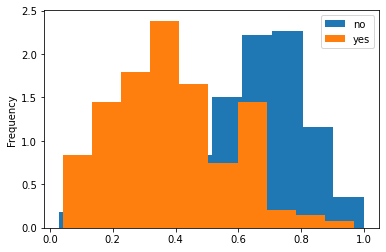

In [87]:
#Визуализировано сравнение распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. 
graphs_15=df_analysis.groupby('quit')['job_satisfaction_rate'].plot(kind='hist',  density=True)
plt.legend()
plt.title('Распредедение job_satisfaction_rate в разрезе quit');

<Axes: xlabel='job_satisfaction_rate', ylabel='Density'>

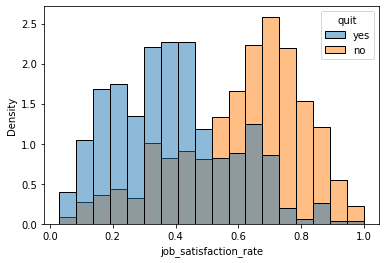

In [88]:
sns.histplot(df_analysis, x='job_satisfaction_rate', hue='quit', stat='density', common_norm=False)
plt.title('Распредедение job_satisfaction_rate в разрезе quit');

<Axes: xlabel='job_satisfaction_rate', ylabel='Density'>

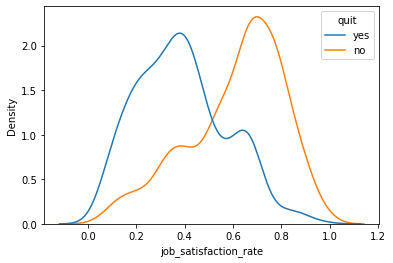

In [89]:
sns.kdeplot(df_analysis, x='job_satisfaction_rate', hue='quit',  
            common_norm=False
           )
plt.title('Распредедение job_satisfaction_rate в разрезе quit');

Итоги:
 - Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. И это показывает исследовательский анализ данных. Во первых, между признаками хорошая корреляция 0,59. Во вторых по графику видно, чтоесть разница в распределениях признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Ушедшие сотрудники обозначны оранжевым и в среднем они удовлетворены работойменее чем в половину (0.4). А вот работники, которые остаются - удовлетворены более чем в половину (0.7). Распределение, отражающее ушедших сотрудников смещено влево, а оставшихся - вправо, к большим значениям признака удовлетворенности работой.
 - Интересно, что еще в задаче 1 в гистограмме job_satisfaction_rate были замечены два пика (это отмечено в итогах). И теперь картина проясняется.

### Шаг 4. Добавление нового входного признака

 - Предполагаем, что job_satisfaction_rate и quit связаны и получено необходимое значение метрики в первой задаче. Поэтому добавлен job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [90]:
X_train = train_quit.set_index('id').drop(columns=['quit'], axis=1)
y_pred = randomized_search.predict(X_train)#предсказание на модели из задачи 1 'job_satisfaction_rate' для нового X_train 
X_train['job_satisfaction_rate'] = y_pred#запись предсказания в отдельную колонку 
X_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.631087
814010,sales,junior,medium,2,no,no,4,27600,0.843158
155091,purchasing,middle,medium,5,no,no,1,37200,0.340000
257132,sales,junior,medium,2,no,yes,3,24000,0.367778
910140,marketing,junior,medium,2,no,no,5,25200,0.797857


In [91]:
y_train = train_quit[['quit', 'id']].set_index('id')#целевой признак
y_train = y_train['quit']
y_train.unique()

array(['no', 'yes'], dtype=object)

In [92]:
test_job['job_satisfaction_rate'] = randomized_search.predict(test_job.drop(columns=['job_satisfaction_rate']))

In [93]:
test_job2 = test_job.join(test_target_quit.set_index('id'))

In [94]:
X_test = test_job2.drop(columns=['quit'], axis=1)
y_test = test_job2['quit']

In [95]:
le = LabelEncoder()

In [96]:
le.fit(['yes', 'no'])

LabelEncoder()

In [97]:
le.classes_ 

array(['no', 'yes'], dtype='<U3')

In [98]:
le.classes_ = np.array(['no', 'yes'])
le.classes_

array(['no', 'yes'], dtype='<U3')

In [99]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [100]:
y_train, y_test

(array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 1, 0, 0]))

Итоги:
- Сформированы выборки X_test, X_train, y_test, y_train
- В выборки X_test, X_train добавлен признак 'job_satisfaction_rate', который был предсказан по лучшей модели Задачи 1


### Шаг 5. Подготовка данных

 - Подготовка признаков выполнена в пайплайне, дополнен пайплайн шага предобработки. При кодировании учитываются особенности признаков и моделей и используется как минимум два кодировщика. (Пайплайн вторая часть)

In [101]:
# определение констант
RANDOM_STATE = 42

In [102]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [103]:
ohe_pipe = Pipeline(
    [
        (
            "simpleImputer_ohe",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "ohe",
            OneHotEncoder(
                drop="first", 
                handle_unknown="error", sparse_output=False #другая версия sparse_output=Fals 
            ),
        ),  
    ]
)

In [104]:
ord_pipe = Pipeline(
    [
        (
            "simpleImputer_before_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "ord",
            OrdinalEncoder(
                categories=[['junior', 'middle', 'sinior'],
                           ['low', 'medium', 'high']],
                handle_unknown="use_encoded_value",
                unknown_value=np.nan,
            ),
        ),
        (
            "simpleImputer_after_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
    ]
)

In [105]:
num_pipe = Pipeline(
    [
        (
            "simpleImputer_num",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "scaler",
            MinMaxScaler(),
        ),  
    ]
)

In [106]:
data_preprocessor = ColumnTransformer(
    [
        ("ohe", ohe_pipe, ohe_columns),
        ("ord", ord_pipe, ord_columns),
        ("num", num_pipe, num_columns),
    ],
    remainder="passthrough",
)

In [107]:
pipe_final = Pipeline(
    [
        ("preprocessor", data_preprocessor),
        ("models", DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)),
        
    ]
)

### Шаг 6. Обучение модели

 - Обучены 4 модели. Для них подобраны гиперпараметры. Проверено качество лучшей модели. Метрика оценки качества в этой задаче — площад под кривой ROC-AUC. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.

In [108]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        "models": [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        "models__max_depth": range(2, 5),
        "models__max_features": range(2, 5),
        "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
    },
    # словарь для модели KNeighborsClassifier()
    {
        "models": [KNeighborsClassifier()],
        "models__n_neighbors": range(2, 5),
        "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
    },
    # словарь для модели LogisticRegression()
    {
        "models": [
            LogisticRegression(
                random_state=RANDOM_STATE, solver="liblinear", penalty="l1"
            )
        ],
        "models__C": range(1, 5),
        "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
    },
    # словарь для модели SVC()
    {
        "models": [SVC(random_state=RANDOM_STATE, probability= True)],
        "models__kernel": ['poly'],
        "models__degree": range(1,4),
        "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
    },
]

In [109]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    error_score='raise',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели по кросс-валидации:', randomized_search.best_score_)


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                       

In [110]:
y_test_pred = randomized_search.predict(X_test)
probabilities = randomized_search.predict_proba(X_test)

In [111]:
probabilities_one = probabilities[:, 1]
print('Площадь под ROC-кривой на тестовой выборке:', roc_auc_score(y_test, probabilities_one).round(2))

Площадь под ROC-кривой на тестовой выборке: 0.92


In [112]:
probabilities_one

array([0.00527844, 0.13397492, 0.05052756, ..., 0.88005231, 0.08573836,
       0.10232735])

In [113]:
probabilities_one.shape

(2000,)

### Шаг 7. Промежуточные выводы

## Выводы

- Заказчиком было предложено две задачи, которые были решены в данном проекте. В первой задаче был предсказан количественный признак job_satisfaction_rate, который отвечает за уровень удовлетворенности сотрудника компанией. Во второй задаче было предсказано то, что сотрудник уволится из компании (качетсвенный признак quit).
- В проекте 4 больших главы: Описание проекта, Задача 1, Задача 2 и Выводы.
- В главе 2 про задачу 1: выполнена загрузка данных, проведена предобработка данных (убраны пустые строки, пропуски же заполнены модой в пайплайне, с помощью SmartImputer). Проведен исследовательский анализ данных и корреляционный анализ данных. Аномалий и выбросов не найдено, у целевого признака 2 пика максимальных значение. Целевой признак имеет корреляцию с зарплатой, годами работы, позицией и загруженностью. Мультиколлинеарность не выявлена. Далее данные были подготовлены к моделированию. При кодировании учитывались особенности признаков и моделей и использовалось два кодировщика: OHE и ORD; так же исспользовались разные способы масштабирования данных.
- Обучены две модели: линейная модель и дерево решений. Подобраны гиперпараметры для одной из моделей. Выбрана лучшая модель и проверено её качество метрикой SMAPE (symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). Модель, которая справилась лучше - DecisionTreeRegressor(max_depth=5, max_features=3, random_state=42). Метрика лучшей модели на тренировочной выборке: 22.129172518681457 Метрика SMAPE на тестовой выборке: 21.082824783126206
- В главе 3 про задачу 2: выполнена загрузка данных, проведена предобработка данных (пропуски заполнены модой в пайплайне, с помощью SmartImputer). Проведен исследовательский анализ данных, описан портрет уволившегося сотрудника, проведен корреляционный анализ иежду целевыми параметрами первой и второй задачи:job_satisfaction_rate и quit. Между признаками есть связь. По графикам также видно, что сотрудники с низким job_satisfaction_rate увольняются чаще. Далее данные были подготовлены к моделированию. При кодировании учитывались особенности признаков и моделей и использовалось два кодировщика: OHE и ORD; так же исспользовались разные способы масштабирования данных.
- Обучены 4 модели. Для них подобраны гиперпараметры. Проверено качество лучшей модели. Метрика оценки качества в этой задаче — площад под кривой ROC-AUC. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. Выбрана лучшая модель, используя заданную метрику. Это LogisticRegression с параметрами : C=4, penalty='l1', random_state=42, solver='liblinear'. Использование регуляризации L1 говорит о том, что модель обнуляет коэффициенты некоторых признаков. solver='liblinear' подходит для бинарной классификации и небольшого набора данных. Это случай этого проекта. C=4 это значение больше дефолтного, тоесть это значение определяют менее сильную регуляризацию, чем дефолтное С=1. Также логистическая регрессия это та модель, которую можно интерпретировать. Площадь под ROC-кривой на тестовых данных: 0.91. Это высокое значение, которое говорит об эфективной работе модели. Это подходит также под заданные заказчиком условия успеха.
 - Бизнес предложения:
  - Так как сотрудники, которые увольняются, в основном новички, которые имеют малую или среднюю загруженность, небольшую зарплату и не отдали компании много лет, то фокусироваться надо на этой группе. Надо проверить, являются ли они стажерами на временных контрактах. Если это так - то надо продлять им контракты. Это позволит удержать молодых в компании.
  - Однако, в целом, уходящие сотрудники не очень довольны работой, это стало понятно после решения первой задачи. Ушедшие сотрудники в среднем удовлетворены работой менее чем в половину (0.4). А вот работники, которые остаются - удовлетворены более чем в половину (0.7). Соответственно, надо менять условия для начинающих работников. Возможно им можно предложить обучение за счет компании, которое в последствии им нужно будет отработать в компании. С одной стороны молодые сотрудники будут довольны, что компания в них вложилась и у них есть профессиональный рост. С другой стороны, они будут связаны с компанией обязательством: либо отработать 2-3-4 года после обучения, либо выплатить компании стоимость обучения.
 - Также, если брать во внимание, что на модель во второй задаче больше всего влияет зарплата, то можно предложить начинающим сотрудникам большую начальную ставку. Но чтобы компания осталась в плюсе, можно повысить требования к сотрудникам, повысить планку при приеме на работу или же вести осторожную и выборочную премиальную политику (премии только лучшим, зарплата и так стала выше).